In [1]:
# notebooks/Seu_Notebook_Principal.ipynb

import sys
import os

# Adiciona a pasta 'scripts' ao PATH do Python para que possamos importar módulos dela
# Isso é crucial se o notebook está em 'notebooks' e a função em 'scripts'
project_root = os.path.dirname(os.path.abspath('')) # Volta para o nível da 'Pasta do Projeto'
scripts_path = os.path.join(project_root, 'scripts')
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

# Agora você pode importar a função
from data_loader import load_data_with_fallback

# --- Configurações para o seu DataFrame ---
# A URL do seu arquivo CSV no GitHub
my_github_url = 'https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/dados_tratados_churn.csv'
# O nome do arquivo (deve ser o mesmo no GitHub e localmente)
my_file_name = 'dados_tratados_churn.csv'

# Chama a função para carregar os dados
dados = load_data_with_fallback(
    github_raw_url=my_github_url,
    file_name=my_file_name,
    local_data_dir='dados', # Confirma que a pasta local é 'dados'
    timeout_seconds=120 # Pode ajustar o timeout aqui
)

# Verifica se o DataFrame foi carregado antes de prosseguir
if dados is not None:
    print("\nDataFrame 'dados' pronto para análise!")
else:
    print("\nNão foi possível carregar o DataFrame. Verifique as mensagens de erro acima.")

INFO: Tentando ler os dados do GitHub da URL: https://raw.githubusercontent.com/moises-rb/Analise_Dados/refs/heads/main/Telecom_X_PrevendoChurn/dados/dados_tratados_churn.csv
INFO: Dados lidos com sucesso do GitHub!
INFO: DataFrame carregado com sucesso! Shape: (7032, 33)



DataFrame 'dados' pronto para análise!


In [2]:
dados.shape

(7032, 33)

In [3]:
dados.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.601663,-1.009430,-0.440327,1.035617,1.533025,-0.954296,0.327189,0.828939,0.026652,-0.745607,...,True,False,True,False,False,True,False,False,False,True
1,-0.601663,0.990658,-0.440327,-0.965608,-0.652305,-0.954296,0.327189,-1.206361,-0.162819,-0.768063,...,False,False,False,False,True,False,False,False,False,True
2,1.662059,0.990658,-0.440327,-0.965608,-0.652305,-1.158016,0.327189,0.828939,0.302548,-0.883456,...,False,False,False,False,False,False,False,False,True,False
3,1.662059,0.990658,2.271039,1.035617,-0.652305,-0.791321,0.327189,0.828939,1.103642,-0.461240,...,False,False,True,False,True,False,False,False,True,False
4,1.662059,-1.009430,2.271039,1.035617,-0.652305,-1.198760,0.327189,0.828939,0.634952,-0.889390,...,True,False,True,False,False,False,False,False,False,True


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7032 non-null   float64
 1   gender                                 7032 non-null   float64
 2   SeniorCitizen                          7032 non-null   float64
 3   Partner                                7032 non-null   float64
 4   Dependents                             7032 non-null   float64
 5   tenure                                 7032 non-null   float64
 6   PhoneService                           7032 non-null   float64
 7   PaperlessBilling                       7032 non-null   float64
 8   MonthlyCharges                         7032 non-null   float64
 9   TotalCharges                           7032 non-null   float64
 10  DailyCharges                           7032 non-null   float64
 11  tenu

In [5]:
X = dados.drop(['Churn', 'tenure_group'], axis=1)
y = dados['Churn']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y  # mantém proporção de Churn nos dois conjuntos
)


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Antes de treinar
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [9]:
print(y_train.unique())
print(y_train.dtype)


[1 0]
int64


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Instanciar modelos
log_model = LogisticRegression(max_iter=1000)
tree_model = DecisionTreeClassifier(random_state=42)
forest_model = RandomForestClassifier(random_state=42)

# Treinar modelos
log_model.fit(X_train_scaled, y_train)
tree_model.fit(X_train, y_train)  # árvores não precisam de dados escalados
forest_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Exemplo para a Random Forest:
y_pred = forest_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, forest_model.predict_proba(X_test)[:,1]))


[[1395  154]
 [ 287  274]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110

ROC AUC Score: 0.8192301628674241


### Etapa 1 - Modelo Base: Avaliação Inicial Antes de Qualquer Ajuste

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve, 
    precision_recall_curve
)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Treinando o modelo base
modelo_base = LogisticRegression(random_state=42, max_iter=1000)
modelo_base.fit(X_train, y_train)
y_pred = modelo_base.predict(X_test)
y_proba = modelo_base.predict_proba(X_test)[:, 1]

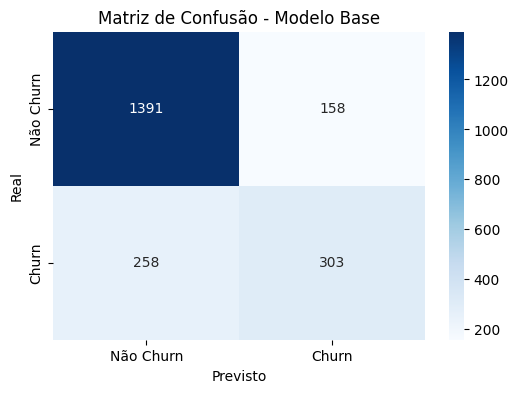

In [14]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Churn", "Churn"], yticklabels=["Não Churn", "Churn"])
plt.title("Matriz de Confusão - Modelo Base")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

In [15]:
# Relatório de classificação
print("Relatório de Classificação - Modelo Base\n")
print(classification_report(y_test, y_pred))

Relatório de Classificação - Modelo Base

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



In [16]:
# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.8453


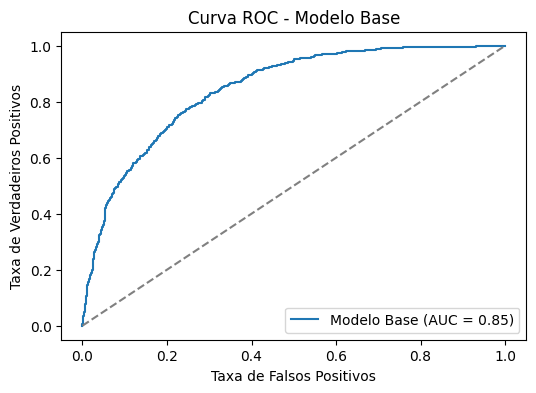

In [17]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Modelo Base (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Curva ROC - Modelo Base")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.legend()
plt.show()

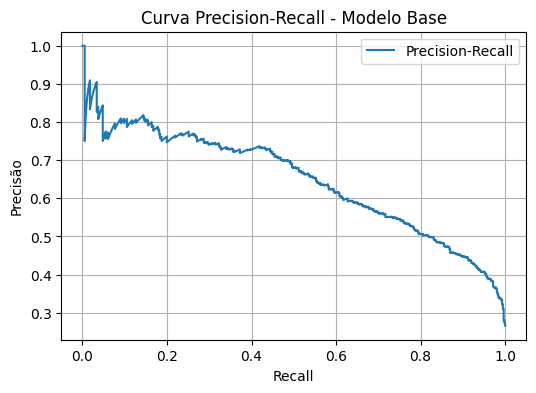

In [18]:
# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label="Precision-Recall")
plt.title("Curva Precision-Recall - Modelo Base")
plt.xlabel("Recall")
plt.ylabel("Precisão")
plt.grid(True)
plt.legend()
plt.show()

### 🔍 Etapa 1 - Avaliação do Modelo Base (Sem Ajustes)

Nesta primeira etapa, treinamos e avaliamos um modelo base de **Regressão Logística** utilizando os dados originais (sem balanceamento e sem ajustes de threshold). O objetivo foi obter um **marco de referência** sobre a performance atual do modelo antes de aplicarmos qualquer técnica de otimização.

#### 🧾 Principais observações:

- A **matriz de confusão** revelou uma quantidade relevante de falsos negativos, ou seja, clientes que dariam churn e o modelo não identificou.
- A **curva ROC** e o valor de **AUC** mostraram que o modelo tem algum poder discriminativo, mas ainda há bastante espaço para melhoria.
- A **curva precision-recall** apontou um nível moderado de precisão quando o modelo decide pelo churn, o que nos alerta sobre o equilíbrio entre capturar churners e não gerar muitos alarmes falsos.

---

### 🎯 Próximos passos:

Sabemos que os dados de churn tendem a ser **desbalanceados** — ou seja, há muito mais clientes que **não cancelam** do que os que **cancelam**. Isso pode fazer com que o modelo "se acomode" em prever a maioria (classe negativa), ignorando justamente quem mais nos interessa: os churners.

Diante disso, na próxima etapa vamos aplicar o **SMOTE (Synthetic Minority Over-sampling Technique)**, uma técnica de oversampling que cria novos exemplos sintéticos da classe minoritária. O objetivo é balancear as classes para que o modelo possa aprender melhor os padrões dos clientes que dão churn.

Vamos em frente! 🚀


### Etapa 2: Aplicação do SMOTE e reavaliação do modelo

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# Aplicar o SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

NameError: name 'SMOTE' is not defined

In [ ]:
# Treinar o modelo com os dados balanceados
modelo_smote = LogisticRegression(max_iter=1000, random_state=42)
modelo_smote.fit(X_resampled, y_resampled)

In [ ]:
# Fazer previsões
y_pred_smote = modelo_smote.predict(X_test)
y_proba_smote = modelo_smote.predict_proba(X_test)[:, 1]

In [ ]:
# Avaliar o novo modelo
print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_smote))

In [ ]:
# Visualizar curva ROC e Precision-Recall
RocCurveDisplay.from_estimator(modelo_smote, X_test, y_test)
plt.title("Curva ROC - Após SMOTE")
plt.show()

In [ ]:
PrecisionRecallDisplay.from_estimator(modelo_smote, X_test, y_test)
plt.title("Curva Precision-Recall - Após SMOTE")
plt.show()